In [84]:
from astropy.table import Table
import matplotlib.pyplot as plt
import math
import numpy
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
import warnings
import time
import sklearn
from sklearn.neighbors import NearestNeighbors
import scipy
from scipy  import spatial
from numpy import loadtxt
import sys
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import pandas
import csv
#Imports possibly useful Python software to use
plt.clf()
plt.cla()
plt.close()
#Clears figure and erases it so that figures can be made later
warnings.filterwarnings('ignore')
#Ignores Python warnings so that they don't show up

In [85]:
def SkyRegionPlot(StarRA,StarDec,RAMin,RAMax,DecMin,DecMax):
    #Creates a plot (picture) of the locations of stars in this region of sky
    #Parameter StarRA is the star right ascension array
    #Parameter StarDec is the star declination array
    #Parameter RAMin is the minimum right ascension limit
    #Parameter RAMax is the maximum right ascension limit
    #Parameter DecMin is the minimum declination limit
    #Parameter DecMax is the maximum declination limit
    plt.rcParams['axes.facecolor']='black'
    plt.rcParams['figure.figsize']=12,12
    #Sets background color and figure size
    plt.plot(StarRA,StarDec,color='xkcd:white',linestyle='None',marker='*',markersize=0.2)
    #Plots coordinates as white stars with no lines
    plt.xlabel('Right Ascension (degrees)')
    plt.ylabel('Declination (degrees)')
    plt.title('Celestial Coordinates of Stars')
    #Adds appropriate labels and title
    plt.xlim([RAMin,RAMax])
    plt.ylim([DecMin,DecMax])
    #Changes the plot limits to cut off edges
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()
    #Clears figure and erases it so that figures can be made later

In [86]:
def PixelSetup(StarRA,StarDec,N):
    #Does math to shift and normalize arrays and makes pixels
    #Parameter StarRA is array of the star right ascensions
    #Parameter StarDec is array of the star declinations
    #Parameter N is the number of pixels desired on each side
    RAStDev=numpy.std(StarRA)
    DecStDev=numpy.std(StarDec)
    #Computes standard deviations of each array
    RAAverage=numpy.average(StarRA)
    DecAverage=numpy.average(StarDec)
    #Computes averages of each array
    RA=StarRA-RAAverage
    RA=RA/RAStDev
    Dec=StarDec-DecAverage
    Dec=Dec/DecStDev
    #Shifts and normalizes the RA and Dec so they are easy to work with
    RAPixels=numpy.linspace(RAMin,RAMax,N)
    DecPixels=numpy.linspace(DecMin,DecMax,N)
    #Creates linearly spaced pixel arrays for next step
    RAPixels=RAPixels-RAAverage
    RAPixels=RAPixels/RAStDev
    DecPixels=DecPixels-DecAverage
    DecPixels=DecPixels/DecStDev
    #Shifts and normalizes pixels to match format
    Pixels2D=numpy.zeros([N,N])
    #Makes two-dimensional pixels array for next steps
    RAPixels=numpy.asarray(RAPixels)
    DecPixels=numpy.asarray(DecPixels)
    return (RAStDev,DecStDev,RAAverage,DecAverage,RA,Dec,RAPixels,DecPixels,Pixels2D)

In [87]:
def NearestNeighbor2D(k):
    #Finds kth nearest neighbors in two dimensions for star array and pixel grid
    #Parameter k is kth neighbor desired
    tic=time.time()
    #Gets starting time
    Gridx=numpy.array([])
    Gridy=numpy.array([])
    #Makes empty arrays for grid values
    rows=N*N
    for i in range(0,N):
        for j in range(0,N):
            Gridx=numpy.append(Gridx,RAPixels[i])
    for i in range(0,N):
        Gridy=numpy.append(Gridy,DecPixels)
    Grid=numpy.vstack((Gridx,Gridy))
    Grid=numpy.transpose(Grid)
    #Sets up the pixel grid for calculation
    StarArray2D=numpy.vstack((RA,Dec))
    StarArray2D=numpy.transpose(StarArray2D)
    #Sets up the star array for calculation
    tree=spatial.cKDTree(StarArray2D)
    #Sets up the cKDTree structure to query through
    NumberOfNeighbors=k
    #Redefines the number of neighbors as k for function usage
    distance,indices=tree.query(Grid,k=[NumberOfNeighbors])
    #Uses cKDTree algorithm to get kth nearest neighbor distances and indices
    print('Done')
    toc=time.time()
    #Gets final time
    ElapsedTime=toc-tic
    ElapsedTimeMinutes=ElapsedTime/60
    print('Elapsed Time:',ElapsedTime,'seconds')
    print('Elapsed Time:',ElapsedTimeMinutes,'minutes')
    #Shows how long the function took
    return (distance,indices);

In [88]:
def DistanceMap2D():
    #Produces two-dimensional distance map with color bar and color mapping for kth nearest neighbor distances
    x=numpy.linspace(RAMin,RAMax,N)
    y=numpy.linspace(DecMin,DecMax,N)
    X,Y=numpy.meshgrid(x,y)
    #Creates grid of the original RA and Dec range
    plt.rcParams['figure.figsize']=12,9
    #Sets figure size
    distances=distance[:,0]
    Distances=numpy.reshape(distances,(-1,N))
    Distances=numpy.transpose(Distances)
    #Sets up the nearest neighbor distances for the plot
    plt.pcolormesh(X,Y,Distances,cmap='viridis')
    plt.xlabel('Right Ascension (degrees)')
    plt.ylabel('Declination (degrees)')
    plt.title('Distance Plot for Nearest Neighbor %g'%(k))
    #Sets appropriate labels and title and plots with color mapping
    cbar=plt.colorbar()
    cbar.set_label('Euclidean 2D (RA/Declination) Distance',rotation='90')
    #Makes a color bar with label
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()
    #Clears figure and erases it so that figures can be made later
    return Distances;

In [89]:
def DistanceMapContour2D(n):
    #Produces contour distance map of the kth nearest neighbor distances
    #Parameter n is number of contours desired
    MinimumLevel=numpy.min(Distances)
    MaximumLevel=numpy.max(Distances)
    AverageLevel=numpy.average(Distances)
    #Gets information on levels for contours
    plt.rcParams['figure.figsize']=12,9
    plt.rcParams['axes.facecolor']='black'
    #Sets figure size and background color
    plt.contour(Distances)
    cbar=plt.colorbar()
    cbar.set_label('Contours of Euclidean 2D (RA/Delination) Distance',rotation='90')
    plt.title('Contour Plot for Distances to Nearest Neighbor %g'%(k))
    plt.xlabel('Right Ascension (degrees)')
    plt.ylabel('Declination (degrees)')
    #Makes contour plot with color bar and title
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()
    #Clears figure and erases it so that figures can be made later

In [90]:
def DistanceSetup(DistanceMin,DistanceMax):
    #Setups the star distance arrays properly and normalizes distances
    #Parameter DistanceMin is the minimum distance desired for the pixels
    #Parameter DistanceMax is the maximum distance desired for the pixels
    StarDistanceSpecial=numpy.array([])
    for i in range(0,len(StarDistance)):
        if StarDistance[i]<DistanceMin:
            StarDistance[i]=100000
        if StarDistance[i]>DistanceMax:
            StarDistance[i]=100000
        if StarDistance[i]<=DistanceMax and StarDistance[i]>=DistanceMin:
            StarDistanceSpecial=numpy.append(StarDistanceSpecial,StarDistance[i])
    DistanceAverage=numpy.average(StarDistanceSpecial)
    DistanceStDev=numpy.std(StarDistanceSpecial)
    Distance=StarDistance-DistanceAverage
    Distance=Distance/DistanceStDev
    #Shifts and normalizes the star distances array like RA and Dec were
    return (DistanceAverage,DistanceStDev,Distance)

In [91]:
def NearestNeighbor3D(k,DistanceMin,DistanceMax,RA,Dec,Distance):
    #Finds the kth nearest neighbor distances and indices in three dimensions using cKDTree algorithm
    #Parameter k is kth nearest neighbor desired
    #Parameter DistanceMin is the minimum distance of the range
    #Parameter DistanceMax is the maximum distance of the range
    #Parameter RA is the shifted and normalized star RA array
    #Parameter Dec is the shifted and normalized star declination array
    #Parameter Distance is the shifted and normalized star distance array
    tic=time.time()
    #Gets starting time
    DistancePixels=numpy.linspace(DistanceMin,DistanceMax,N)
    DistancePixels=DistancePixels-DistanceAverage
    DistancePixels=DistancePixels/DistanceStDev
    DistancePixels=numpy.asarray(DistancePixels)
    #Produces distance pixel array
    Pixels=numpy.zeros([N,N,N])
    StarArray=numpy.vstack((RA,Dec,Distance))
    StarArray=numpy.transpose(StarArray)
    #Prepares star location three dimensional array
    NumberOfPoints=N*N*N
    PixelArray=numpy.zeros((NumberOfPoints,3))
    i=0
    for RA in RAPixels:
        for Dec in DecPixels:
            for Distance in DistancePixels:
                PixelArray[i,0]=RA
                PixelArray[i,1]=Dec
                PixelArray[i,2]=Distance
                i+=1
    #Prepares pixel grid three dimensional array
    tree=spatial.cKDTree(StarArray)
    #Sets up the cKDTree structure to query through
    NumberOfNeighbors=k
    #Redefines the number of neighbors as k for function usage
    Distances3D,Indices3D=tree.query(PixelArray,k=[NumberOfNeighbors])
    #Uses cKDTree algorithm to get kth nearest neighbor distances and indices
    print('Done')
    toc=time.time()
    #Gets final time
    ElapsedTime=toc-tic
    ElapsedTimeMinutes=ElapsedTime/60
    print('Elapsed Time:',ElapsedTime,'seconds')
    print('Elapsed Time:',ElapsedTimeMinutes,'minutes')
    #Shows how long the function took to run
    return (DistancePixels,StarArray,NumberOfPoints,Distances3D,Indices3D);

In [165]:
def DistanceMap3D(Distances3D,ElevationAngle,AzimuthalAngle):
    #Creates the three-dimensional kth nearest neighbor distance arrays needed and plots in 3D the distance map
    #Also creates three-dimensional plot of star locations for comparison and combines these plots
    #Parameter Distances3D is the sequence of three-dimensional kth nearest neighbor distances
    #Parameter ElevationAngle is the angle above the xy-plane for the plot
    #Parameter AzimuthalAngle is the angle rotated around the z-axis
    tic=time.time()
    #Gets starting time
    fig=plt.figure()
    ax=plt.axes(projection='3d')
    #Sets up a new figure and establishes the settings as three-dimensional
    x=numpy.linspace(RAMin,RAMax,N)
    y=numpy.linspace(DecMin,DecMax,N)
    z=numpy.linspace(DistanceMin,DistanceMax,N)
    #Making fresh array of linearly spaced points for each axis
    PlotPixelArray=numpy.zeros((NumberOfPoints,3))
    #Creates list with 3 columns to be used for plotting later
    i=0
    for RA in x:
        for Dec in y:
            for Distance in z:
                PlotPixelArray[i,0]=RA
                PlotPixelArray[i,1]=Dec
                PlotPixelArray[i,2]=Distance
                i+=1
    X=PlotPixelArray[:,0]
    Y=PlotPixelArray[:,1]
    Z=PlotPixelArray[:,2]
    #Uses a loop to cycle through all grid points and makes X, Y, and Z vectors to plot
    Pixels=numpy.zeros([N,N,N])
    #Makes 3D grid array of zeros
    for RA in range(0,N):
        for Dec in range(0,N):
            for Distance in range(0,N):
                Pixels[RA,Dec,Distance]=Distances3D[RA+Dec+Distance]
    #Sets as each element in the 3D grid array the kth nearest neighbor distance
    plt.rcParams['figure.figsize']=12,12
    plt.rcParams['axes.facecolor']='white'
    #Sets the figure size and background color
    Distances3D=numpy.ndarray.flatten(Distances3D)
    #Flattens the distances array into a one-dimensional vector for use as a color mapping
    Map3D=ax.scatter3D(X,Y,Z,c=Distances3D,cmap='viridis',marker='o',s=0.5,depthshade=True,alpha=0.2)
    #Plots in 3D translucent vectors with the color map as the kth nearest neighor distance with opacity varying to show depth
    plt.title('3D Distance Map for Nearest Neighbor %g'%(k))
    ax.set_xlabel('Right Ascension (degrees)')
    ax.set_xlim([RAMin,RAMax])
    ax.set_ylabel('Declination (degrees)')
    ax.set_ylim([DecMin,DecMax])
    ax.set_zlabel('Distance (pc)')
    ax.set_zlim([0,DistanceMax])
    #Makes appropriate title, axis labels, and limits for variables
    cbar=fig.colorbar(Map3D,shrink=0.75)
    cbar.set_label('3D (RA/Declination/Distance) Distance',rotation='90')
    #Adds a color bar for the 3D distance, labels it, and rotates the label
    ax.view_init(ElevationAngle,AzimuthalAngle)
    #Changes the perspective of the plot
    plt.show()
    fig=plt.figure()
    ax=plt.axes(projection='3d')
    #Creates another new figure and reestablishes 3D axis settings
    plt.rcParams['figure.figsize']=12,12
    plt.rcParams['axes.facecolor']='white'
    ax.scatter3D(X,Y,Z,c=Distances3D,cmap='viridis',marker='o',s=0.5,depthshade=True,alpha=0.2)
    #Plots in 3D translucent vectors with the color map as the kth nearest neighor distance with opacity varying to show depth
    cbar=fig.colorbar(Map3D,shrink=0.75)
    cbar.set_label('3D (RA/Declination/Distance) Distance',rotation='90')
    #Adds a color bar for the 3D distance, labels it, and rotates the label
    ax.scatter3D(StarRA,StarDec,StarDistance,c='xkcd:green',marker='*',s=0.5,depthshade=True)
    #Plots the three-dimensional position of all stars as green stars with opacity varying to show depth
    plt.title('3D Distance Map with Star Locations for Nearest Neighbor %g'%(k))
    ax.set_xlabel('Right Ascension (degrees)')
    ax.set_xlim([RAMin,RAMax])
    ax.set_ylabel('Declination (degrees)')
    ax.set_ylim([DecMin,DecMax])
    ax.set_zlabel('Distance (pc)')
    ax.set_zlim([0,DistanceMax])
    #Makes appropriate title, axis labels, and limits for variables
    ax.view_init(ElevationAngle,AzimuthalAngle)
    #Changes the perspective of the plot
    plt.show()
    toc=time.time()
    #Gets final time
    ElapsedTime=toc-tic
    ElapsedTimeMinutes=ElapsedTime/60
    print('Elapsed Time:',ElapsedTime,'seconds')
    print('Elapsed Time:',ElapsedTimeMinutes,'minutes')
    #Shows how long the function took to run
    return (PlotPixelArray,X,Y,Z,Pixels)

In [124]:
def CloudCalculations():
    #Runs the calculations to set up cloud plots in three-dimensional space
    tic=time.time()
    #Gets the starting time
    Distance3DMed=numpy.median(Distances3D)
    Distance3DAvg=numpy.average(Distances3D)
    #Computes the median and average of the kth nearest neighbor three-dimensional distance
    Cloudx=numpy.array([])
    Cloudy=numpy.array([])
    Cloudz=numpy.array([])
    #Makes empty arrays for the next step
    for i in range(0,len(Distances3D)):
        if Distances3D[i]>=(1/3)*max(Distances3D):
            Cloudx=numpy.append(Cloudx,X[i])
            Cloudy=numpy.append(Cloudy,Y[i])
            Cloudz=numpy.append(Cloudz,Z[i])
    #Adds to the RA, declination, and distance arrays if the kth nearest neighbor distance is equal to or greater than one third
    #of the maximum kth nearest neighbor distance
    toc=time.time()
    #Gets the final time
    ElapsedTime=toc-tic
    ElapsedTimeMinutes=ElapsedTime/60
    print('Elapsed Time:',ElapsedTime,'seconds')
    print('Elapsed Time:',ElapsedTimeMinutes,'minutes')
    #Shows how long the function took to run
    return (Distance3DMed,Distance3DAvg,Cloudx,Cloudy,Cloudz)

In [128]:
def CloudPlot(BackgroundColor,ElevationAngleVector,AzimuthalAngleVector):
    #Plots the three-dimensional "surface" and interior of supposed clouds for the given region of the sky
    #Parameter BackgroundColor is the plot's plane colors (theme) and must be a string; currently supported entries are 'black'
    #and 'white'
    #Parameter ElevationAngleVector is a vector containing the different elevation angles above xy-plane desired to be shown
    #Parameter AzimuthalAngleVector is a vector containing the different azimuthal angles (rotating around z-axis) desired to be
    #shown
    tic=time.time()
    #Gets the starting time
    plt.rcParams['axes.facecolor']='white'
    #Sets figure background color
    if BackgroundColor=='black':
        for i in range(0,len(AzimuthalAngleVector)):
            for j in range(0,len(ElevationAngleVector)):
                print(ElevationAngleVector[j],'degrees above xy-plane;',AzimuthalAngleVector[i]+45,'degrees rotated from standard view')
                fig=plt.figure()
                ax=plt.axes(projection='3d')
                #Sets up a figure and establishes the settings as three-dimensional
                ax.w_xaxis.set_pane_color((0,0,0,1))
                ax.w_yaxis.set_pane_color((0,0,0,1))
                ax.w_zaxis.set_pane_color((0,0,0,1))
                #Makes the graph color (theme) black
                ax.scatter3D(X,Y,200,color='xkcd:dark sky blue',marker='o',s=1,depthshade=True,alpha=1)
                #Makes a plane at a distance of 200 pc from Earth to partition off clouds from region of no assumed extinction
                ax.scatter3D(Cloudx,Cloudy,Cloudz,color='xkcd:grey',marker='o',s=0.25,depthshade=True,alpha=0.5)
                #Makes scatter plot in grey to show the structure of the clouds ("surface" and interior)
                ax.view_init(ElevationAngleVector[j],AzimuthalAngleVector[i])
                #Sets the perspective to go through all of the combinations of the specified elevation and azimuthal angles
                plt.title('3D Cloud Plot for Nearest Neighbor %g'%(k))
                ax.set_xlabel('Right Ascension (degrees)')
                ax.set_xlim([RAMin,RAMax])
                ax.set_ylabel('Declination (degrees)')
                ax.set_ylim([DecMin,DecMax])
                ax.set_zlabel('Distance (pc)')
                ax.set_zlim([0,DistanceMax])
                #Makes appropriate title, axis labels, and limits for variables
                plt.show()
    if BackgroundColor=='white':
        for i in range(0,len(AzimuthalAngleVector)):
            for j in range(0,len(ElevationAngleVector)):
                print(ElevationAngleVector[j],'degrees above xy-plane;',AzimuthalAngleVector[i]+45,'degrees rotated from standard view')
                fig=plt.figure()
                ax=plt.axes(projection='3d')
                #Sets up a figure and establishes the settings as three-dimensional
                ax.w_xaxis.set_pane_color((1,1,1,1))
                ax.w_yaxis.set_pane_color((1,1,1,1))
                ax.w_zaxis.set_pane_color((1,1,1,1))
                #Makes the graph color (theme) white
                ax.scatter3D(X,Y,200,color='xkcd:dark sky blue',marker='o',s=1,depthshade=True,alpha=1)
                #Makes a plane at a distance of 200 pc from Earth to partition off clouds from region of no assumed extinction
                ax.scatter3D(Cloudx,Cloudy,Cloudz,color='xkcd:silver',marker='o',s=0.25,depthshade=True,alpha=0.5)
                #Makes scatter plot in silver to show the structure of the clouds ("surface" and interior)
                ax.view_init(ElevationAngleVector[j],AzimuthalAngleVector[i])
                #Sets the perspective to go through all of the combinations of the specified elevation and azimuthal angles
                plt.title('3D Cloud Plot for Nearest Neighbor %g'%(k))
                ax.set_xlabel('Right Ascension (degrees)')
                ax.set_xlim([RAMin,RAMax])
                ax.set_ylabel('Declination (degrees)')
                ax.set_ylim([DecMin,DecMax])
                ax.set_zlabel('Distance (pc)')
                ax.set_zlim([0,DistanceMax])
                #Makes appropriate title, axis labels, and limits for variables
                plt.show()
    #Takes the color input parameter and changes the plot settings accordingly
    toc=time.time()
    #Gets final time
    ElapsedTime=toc-tic
    ElapsedTimeMinutes=ElapsedTime/60
    print('Elapsed Time:',ElapsedTime,'seconds')
    print('Elapsed Time:',ElapsedTimeMinutes,'minutes')
    #Shows how long the function took to run

In [132]:
def Contour3D(n,p,q,ColorVector,theta,phi):
    #Manually creates "contours" in three dimensions with the chosen color mapping being the kth nearest neighbor distance
    #Parameter n is the number of total contour levels desired
    #Parameter p is the starting number of the n contour levels to be shown in the plot (must be a positive number)
    #Parameter q is the final number of the n contour levels to be shown in the plot
    #Parameter ColorVector is the vector of strings of color names; this cannot be an RGB or RGBA tuple, only strings work
    #Parameter theta is the desired elevation angle above the xy-plane for the plot
    #Parameter phi is the desired azimuthal angle (around z-axis) rotated from +45 degrees from the standard view
    tic=time.time()
    #Gets the starting time
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    #Creates a figure and makes the settings three-dimensional for plotting
    plt.rcParams['figure.figsize']=12,12
    plt.rcParams['axes.facecolor']='white'
    #Sets the figure size and background color
    Distance3DMin=min(Distances3D)
    Distance3DMax=max(Distances3D)
    #Computes the minimum and maximum of the kth nearest neighbor distances in 3D
    ContourLevels=numpy.linspace(Distance3DMin,Distance3DMax,n)
    #Makes a linearly spaced vector between the minimum and maximum kth nearest neighbor distances with n contour levels
    for i in range(p-1,q-1):
        Contourx=numpy.array([])
        Contoury=numpy.array([])
        Contourz=numpy.array([])
        #Creates empty arrays for use in the next step
        for j in range(0,len(Distances3D)):
            if Distances3D[j]>=ContourLevels[i] and Distances3D[j]<=ContourLevels[i+1]:
                Contourx=numpy.append(Contourx,X[j])
                Contoury=numpy.append(Contoury,Y[j])
                Contourz=numpy.append(Contourz,Z[j])
        #Appends to the contour coordinate arrays if the pixel's kth nearest neighbor distance lies between the two contours
        ax.scatter3D(Contourx,Contoury,Contourz,c=ColorVector[i],marker='o',s=0.5,depthshade=True,alpha=0.2)
        #Plots translucent points with the color map as the kth nearest neighor distance with opacity varying to show depth
    ax.view_init(theta,phi)
    #Sets the perspective for the desired elevation and azimuthal angles
    plt.title('3D Contour Plot for Nearest Neighbor %g and Contour Levels %g-%g out of %g Shown'%(k,p,q,n))
    ax.set_xlabel('Right Ascension (degrees)')
    ax.set_xlim([RAMin,RAMax])
    ax.set_ylabel('Declination (degrees)')
    ax.set_ylim([DecMin,DecMax])
    ax.set_zlabel('Distance (pc)')
    ax.set_zlim([0,DistanceMax])
    #Makes appropriate title, axis labels, and limits for variables
    plt.show()
    toc=time.time()
    #Gets final time
    ElapsedTime=toc-tic
    ElapsedTimeMinutes=ElapsedTime/60
    print('Elapsed Time:',ElapsedTime,'seconds')
    print('Elapsed Time:',ElapsedTimeMinutes,'minutes')
    #Shows how long the function took to run
    return (Distance3DMin,Distance3DMax,ContourLevels)

In [96]:
def DisplayColorVector(ColorVector):
    #Shows on a meaningless graph the order, length, and variation of the color vector for plots
    #Parameter ColorVector is the vector of colors used for 3D contours
    fig=plt.figure()
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['figure.figsize']=12,12
    #Makes figure and sets background color and figure size
    for i in range(0,len(ColorVector)):
        plt.scatter(i,i,c=ColorVector[i],s=500,marker='o',alpha=1)
    #Plots as points along y=x the sequence of colors in the color vector to see them
    plt.title('xkcd Colors Viridis Analog Visualization')
    plt.xlabel('Index in Color Vector')
    plt.ylabel('Index in Color Vector')
    plt.xlim([-1,len(ColorVector)])
    plt.ylim([-1,len(ColorVector)])
    #Sets appropriate title, axis limits, and axis labels
    plt.show()

In [97]:
def GoodParallaxData(StarRA,StarDec,StarParallax):
    #Checks which stars have good parallax data and keeps those
    #Important Note! You should reimport your star coordinates before running this function to get fresh data
    #Parameter StarRA is the clean RA data for the stars
    #Parameter StarDec is the clean Dec data for the stars
    #Parameter StarParallax is the clean parallax data for the stars
    StarParallaxTemp=numpy.array([])
    StarRATemp=numpy.array([])
    StarDecTemp=numpy.array([])
    for i in range(0,len(StarParallax)):
        if StarParallax[i]>=0:
            StarParallaxTemp=numpy.append(StarParallaxTemp,StarParallax[i])
            StarRATemp=numpy.append(StarRATemp,StarRA[i])
            StarDecTemp=numpy.append(StarDecTemp,StarDec[i])
    StarParallax=StarParallaxTemp
    StarRA=StarRATemp
    StarDec=StarDecTemp
    ParallaxCount=len(StarParallax)
    #Counts number of stars that had good parallax
    TotalStarNumber=336739
    #Gives the total number of stars that was in the original data set
    ParallaxPercentage=(ParallaxCount/TotalStarNumber)*100
    print('The number of stars in this data set which have good parallaxes provided is:',ParallaxCount,'(%g percent)'%(ParallaxPercentage))
    #Computes percentage of stars in data set that had good parallax data
    StarParallaxArcsec=(1/1000)*StarParallax
    StarDistance=1/StarParallaxArcsec
    #Finds the distance array for all the stars
    return (StarRA,StarDec,StarParallax,ParallaxCount,ParallaxPercentage,StarDistance)

In [98]:
def RealisticCoordinates(StarDistance,StarDec,StarRA):
    #Transforms the distance, RA, and declination into spherical coordinates in units of parsecs (pc) and radians and then
    #changes the star coordinates into rectangular coordinates in space, which is the realistic picture
    #Parameter StarDistance is the array of distances to the stars in pc
    #Parameter StarDec is the array of star declinations in degrees
    #Parameter StarRA is the array of right ascensions of the stars in degrees
    tic=time.time()
    #Gets starting time
    Starrho=StarDistance
    #Assigns the star rho coordinates as the distance in parsecs (pc)
    NinetyDegrees=90*numpy.ones(len(StarDec))
    #Creates a vector of 90s the same length as the number of stars
    pi=math.pi
    #Renames pi so it is easier to use in calculations
    Startheta=(pi/180)*(NinetyDegrees-StarDec)
    #Computes the star theta coodinates in radians, where 0 radians is the celestial north pole and pi/2 is the celestial equator
    Starphi=(pi/180)*StarRA
    #Computes the star phi coordinates in radians, where 0 radians is the RA of the vernal equinox
    Starx=numpy.array([])
    Stary=numpy.array([])
    Starz=numpy.array([])
    #Creates empty arrays for the x, y, and z coordinates in space
    rhoMin=min(Starrho)
    rhoMax=max(Starrho)
    thetaMin=min(Startheta)
    thetaMax=max(Startheta)
    phiMin=min(Starphi)
    phiMax=max(Starphi)
    #Computes minimum and maximum of each spherical coordinate
    for i in range(0,len(StarRA)):
        Starx=numpy.append(Starx,Starrho[i]*math.sin(Startheta[i])*math.cos(Starphi[i]))
        Stary=numpy.append(Stary,Starrho[i]*math.sin(Startheta[i])*math.sin(Starphi[i]))
        Starz=numpy.append(Starz,Starrho[i]*math.cos(Startheta[i]))
    #Uses spherical-to-rectangular coordinate transformation to find x, y, and z coordinates in space of the stars
    xMin=min(Starx)
    xMax=max(Starx)
    yMin=min(Stary)
    yMax=max(Stary)
    zMin=min(Starz)
    zMax=max(Starz)
    #Computes minimum and maximum of each rectangular coordinate
    toc=time.time()
    #Gets final time
    ElapsedTime=toc-tic
    ElapsedTimeMinutes=ElapsedTime/60
    print('Elapsed Time:',ElapsedTime,'seconds')
    print('Elapsed Time:',ElapsedTimeMinutes,'minutes')
    #Shows how long the function took to run
    return (Starrho,pi,Startheta,Starphi,Starx,Stary,Starz,rhoMin,rhoMax,thetaMin,thetaMax,phiMin,phiMax,xMin,xMax,yMin,yMax,zMin,zMax)

In [99]:
def RealisticPixelSetup(Starrho,Startheta,Starphi,rhoMin,rhoMax,thetaMin,thetaMax,phiMin,phiMax,N):
    #Sets up the star data and makes realistic coordinate pixels to do computations
    #Parameter Starrho is the array of the star rho coordinates
    #Parameter Startheta is the array of the star theta coordinates
    #Parameter Starphi is the array of the star phi coordinates
    #Parameter rhoMin is the minimum of the star rho coordinates
    #Parameter rhoMax is the maximum of the star rho coordinates
    #Parameter thetaMin is the minimum of the star theta coordinates
    #Parameter thetaMax is the maximum of the star theta coordinates
    #Parameter phiMin is the minimum of the star phi coordinates
    #Parameter phiMax is the maximum of the star phi coordinates
    #Parameter N is the number of pixels desired for each coordinate
    tic=time.time()
    #Gets starting time
    rhoPixels=numpy.linspace(rhoMin,rhoMax,N)
    thetaPixels=numpy.linspace(thetaMin,thetaMax,N)
    phiPixels=numpy.linspace(phiMin,phiMax,N)
    NumberOfPoints=N**3
    PixelArray=numpy.zeros((NumberOfPoints,3))
    i=0
    for rho in rhoPixels:
        for theta in thetaPixels:
            for phi in phiPixels:
                PixelArray[i,0]=rho
                PixelArray[i,1]=theta
                PixelArray[i,2]=phi
                i+=1
    #Makes array that has all of the pixel data with all the needed permutations
    rhoPixels=PixelArray[:,0]
    thetaPixels=PixelArray[:,1]
    phiPixels=PixelArray[:,2]
    #Extracts the pixel arrays from this matrix
    xPixels=numpy.array([])
    yPixels=numpy.array([])
    zPixels=numpy.array([])
    #Creates empty arrays for the x, y, and z pixels
    for i in range(0,NumberOfPoints):
        xPixels=numpy.append(xPixels,rhoPixels[i]*math.sin(thetaPixels[i])*math.cos(phiPixels[i]))
        yPixels=numpy.append(yPixels,rhoPixels[i]*math.sin(thetaPixels[i])*math.sin(phiPixels[i]))
        zPixels=numpy.append(zPixels,rhoPixels[i]*math.cos(thetaPixels[i]))
    #Uses transformation to make the rectangular pixel arrays
    xStDev=numpy.std(Starx)
    xAverage=numpy.average(Starx)
    x=Starx-xAverage
    x=x/xStDev
    #Shifts and normalizes the x coordinate
    yStDev=numpy.std(Stary)
    yAverage=numpy.average(Stary)
    y=Stary-yAverage
    y=y/yStDev
    #Shifts and normalizes the y coordinate
    zStDev=numpy.std(Starz)
    zAverage=numpy.average(Starz)
    z=Starz-zAverage
    z=z/zStDev
    #Shifts and normalizes the z coordinate
    xPix=xPixels-xAverage
    xPix=xPix/xStDev
    yPix=yPixels-yAverage
    yPix=yPix/yStDev
    zPix=zPixels-zAverage
    zPix=zPix/zStDev
    xPix=numpy.asarray(xPix)
    yPix=numpy.asarray(yPix)
    zPix=numpy.asarray(zPix)
    #Shifts, normalizes, and makes as an array the rectangular pixel arrays
    RealisticPixels=numpy.zeros([N,N,N])
    #Makes three-dimensional array of zeros with N pixels on each side for use later on
    toc=time.time()
    #Gets final time
    ElapsedTime=toc-tic
    ElapsedTimeMinutes=ElapsedTime/60
    print('Elapsed Time:',ElapsedTime,'seconds')
    print('Elapsed Time:',ElapsedTimeMinutes,'minutes')
    #Shows how long the function took to run
    return (NumberOfPoints,xPixels,yPixels,zPixels,xStDev,xAverage,x,yStDev,yAverage,y,zStDev,zAverage,z,xPix,yPix,zPix,RealisticPixels)

In [100]:
def RealisticNearestNeighbor(x,y,z,k):
    #Computes the distance to the kth nearest neighbor using kdTree algorithm in realistic space
    #Parameter x is the array of shifted and normalized star x coordinates
    #Parameter y is the array of shifted and normalized star y coordinates
    #Parameter z is the array of shifted and normalized star z coordinates
    #Parameter k is the number of nearest neighbors desired
    tic=time.time()
    #Gets starting time
    RealisticStarArray=numpy.vstack((x,y,z))
    RealisticStarArray=numpy.transpose(RealisticStarArray)
    #Makes an array of all the normalized star data
    RealisticPixelArray=numpy.vstack((xPix,yPix,zPix))
    RealisticPixelArray=numpy.transpose(RealisticPixelArray)
    #Prepares array of all of the normalized pixel data
    tree=spatial.cKDTree(RealisticStarArray)
    NumberOfNeighbors=k
    RealisticDistances,RealisticIndices=tree.query(RealisticPixelArray,k=[NumberOfNeighbors])
    #Uses the kdTree algorithm to find the nearest neighbor distances
    toc=time.time()
    #Gets final time
    ElapsedTime=toc-tic
    ElapsedTimeMinutes=ElapsedTime/60
    print('Elapsed Time:',ElapsedTime,'seconds')
    print('Elapsed Time:',ElapsedTimeMinutes,'minutes')
    #Shows how long the function took to run
    return (RealisticStarArray,RealisticDistances,RealisticIndices)

In [152]:
def RealisticSpacePlot(ElevationAngle,AzimuthalAngle):
    #Plots the realistic space view to get a feeling for how the stars are oriented
    #Parameter ElevationAngle is the angle above the xy-plane to view the plot from
    #Parameter AzimuthalAngle is the angle rotated around the z-axis to view the plot from
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    #Creates a figure and makes the settings three-dimensional for plotting
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['figure.figsize']=12,12
    #Sets up figure color and size
    ax.scatter3D(Starx,Stary,Starz,c='xkcd:pale blue',marker='*',s=0.5,depthshade=True,alpha=1,label='Star Locations')
    #Plots the realistic star locations as pale blue stars
    ax.scatter3D(xPixels,yPixels,zPixels,c='xkcd:green',marker='o',s=1e-3,depthshade=True,alpha=1,label='Pixels')
    #Plots the pixels as green circles
    ax.scatter3D(0,0,0,c='xkcd:dark sky blue',marker='o',s=100,depthshade=False,alpha=1,label='Earth')
    #Plots the location of the Earth as a large dark sky blue circle
    ax.scatter3D(numpy.zeros(1000),numpy.zeros(1000),numpy.linspace(0,zMax,1000),c='xkcd:cobalt',s=1,label='North Celestial Pole')
    #Plots in cobalt the line extending to represent the north celestial pole
    ax.scatter3D(1e6,1e6,1e6,c='xkcd:red',marker='o',s=5,label='Celestial Equator')
    #Plots in red the celestial equator in space
    ax.w_xaxis.set_pane_color((0,0,0,1))
    ax.w_yaxis.set_pane_color((0,0,0,1))
    ax.w_zaxis.set_pane_color((1,0,0,1))
    #Colors the x- and y-planes black and the z plane red
    plt.title('Visualization of Realistic Space Coordinates')
    ax.set_xlabel('x (pc)')
    ax.set_xlim([-580,0])
    ax.set_ylabel('y (pc)')
    ax.set_ylim([-580,0])
    ax.set_zlabel('z (pc)')
    ax.set_zlim([-580,0])
    #Sets appropriate title, axis limits, and axis labels
    ax.view_init(ElevationAngle,AzimuthalAngle)
    #Sets viewing angle to see what is going on well
    ax.legend(loc='right',markerscale=1,title='Legend',edgecolor='black',facecolor='white')
    #Creates a legend on the right side to show the labels
    plt.show()

In [171]:
def RealisticDistanceMap(RealisticDistances,ElevationAngle,AzimuthalAngle):
    #Makes the 3D distance map for realistic space coordinates for the sky region
    #Parameter RealisticDistances is the array of realistic space kth nearest neighbor distances
    #Parameter ElevationAngle is the angle above the xy-plane for the plot
    #Parameter AzimuthalAngle is the angle rotated around the z-axis for the plot
    tic=time.time()
    #Gets starting time
    fig=plt.figure()
    ax=plt.axes(projection='3d')
    #Sets up a new figure and establishes the settings as three-dimensional
    plt.rcParams['figure.figsize']=12,12
    plt.rcParams['axes.facecolor']='white'
    #Sets the figure size and background color
    for x in range(0,N):
        for y in range(0,N):
            for z in range(0,N):
                RealisticPixels[x,y,z]=RealisticDistances[x+y+z]
    #Sets as each element in the 3D grid array the kth nearest realistic neighbor distance
    RealisticDistances=numpy.ndarray.flatten(RealisticDistances)
    #Flattens the realistic distances array into a one-dimensional vector for use as a color mapping
    RealisticMap=ax.scatter3D(xPixels,yPixels,zPixels,c=RealisticDistances,cmap='viridis',marker='o',s=1e-3,depthshade=True,alpha=0.5)
    #Plots the distance mapping using a color bar scale for the kth nearest neighbor distances
    ax.scatter3D(0,0,0,c='xkcd:dark sky blue',marker='o',s=100,depthshade=False,alpha=1)
    #Plots the Earth to see where it is relative to the distance map
    plt.title('Realistic Distance Map in Space for Nearest Neighbor %g'%(k))
    ax.set_xlabel('x (pc)')
    ax.set_xlim([-580,0])
    ax.set_ylabel('y  (pc)')
    ax.set_ylim([-580,0])
    ax.set_zlabel('z (pc)')
    ax.set_zlim([-580,0])
    #Makes appropriate title, axis labels, and limits for variables
    cbar=fig.colorbar(RealisticMap,shrink=0.75)
    cbar.set_label('Realistic Space 3D (x/y/z) Distance',rotation='90')
    #Adds a color bar for the realistic kth nearest neighbor distance, labels it, and rotates the label
    ax.view_init(ElevationAngle,AzimuthalAngle)
    #Sets an appropriate viewing orientation for the plot
    plt.show()
    fig=plt.figure()
    ax=plt.axes(projection='3d')
    #Creates another figure and reestablishes 3D axis settings
    RealisticMap=ax.scatter3D(xPixels,yPixels,zPixels,c=RealisticDistances,cmap='viridis',marker='o',s=1e-3,depthshade=True,alpha=0.5)
    ax.scatter3D(0,0,0,c='xkcd:dark sky blue',marker='o',s=100,depthshade=False,alpha=1)
    cbar=fig.colorbar(RealisticMap,shrink=0.75)
    cbar.set_label('Realistic Space 3D (x/y/z) Distance',rotation='90')
    #Does the same thing for the distance map
    ax.scatter3D(Starx,Stary,Starz,c='xkcd:red',marker='*',s=1e-3,depthshade=True)
    #Plots the realistic positions of all stars as red stars with opacity varying to show depth
    plt.title('Realistic Distance Map in Space with Star Locations for Nearest Neighbor %g'%(k))
    ax.set_xlabel('x (pc)')
    ax.set_xlim([-580,0])
    ax.set_ylabel('y  (pc)')
    ax.set_ylim([-580,0])
    ax.set_zlabel('z (pc)')
    ax.set_zlim([-580,0])
    #Makes appropriate title, axis labels, and limits for variables
    ax.view_init(ElevationAngle,AzimuthalAngle)
    #Sets an appropriate viewing orientation for the plot
    plt.show()
    toc=time.time()
    #Gets final time
    ElapsedTime=toc-tic
    ElapsedTimeMinutes=ElapsedTime/60
    print('Elapsed Time:',ElapsedTime,'seconds')
    print('Elapsed Time:',ElapsedTimeMinutes,'minutes')
    #Shows how long the function took to run
    return (RealisticPixels)

The number of stars in this data set which have parallaxes provided is: 249711 (74.1557 percent)

The columns available with these data are:

StarRA:
[248.52036634 248.10048436 248.4724496  ... 246.05108056 245.85190497
 245.6453111 ]

StarRAError:
[0.43557528 1.00834076 0.44674483 ... 0.61276532 0.32391122 0.57407355]

StarDec:
[-21.69423876 -21.79532743 -21.64183886 ... -23.35729622 -23.38019673
 -23.26056138]

StarDecError:
[0.26234466 0.48755589 0.24268439 ... 0.28051106 0.1625579  0.31605514]

StarParallax:
[ 0.81715249 -1.35641518  1.64768465 ...  0.08376922 -0.25246162
  1.23497203]

StarParallaxError:
[0.45127778 1.25915587 0.47063415 ... 0.68549722 0.35004803 0.58047573]

StarDistance:
[ 1223.76180212  -737.2373997    606.91224939 ... 11937.55952112
 -3960.99814004   809.73494008]



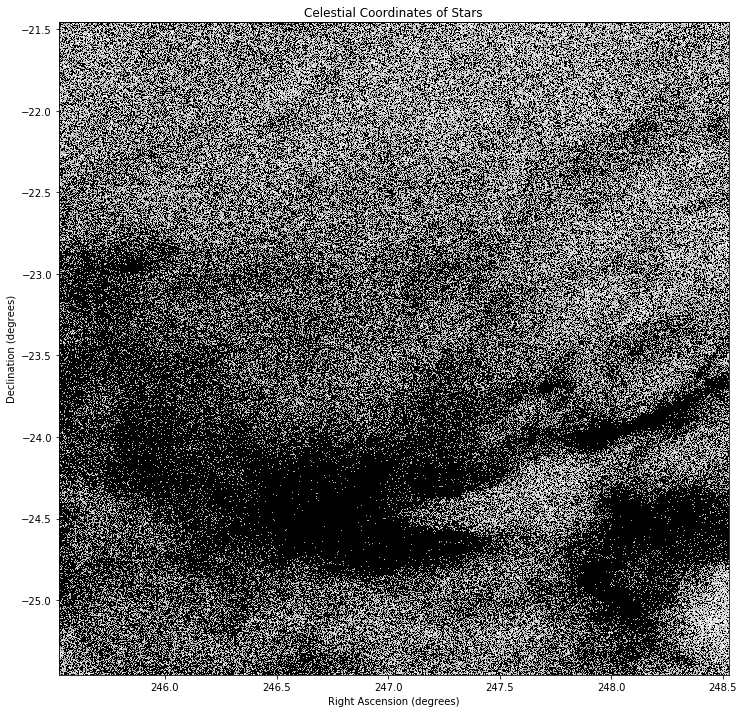

Done
Elapsed Time: 0.22064900398254395 seconds
Elapsed Time: 0.003677483399709066 minutes


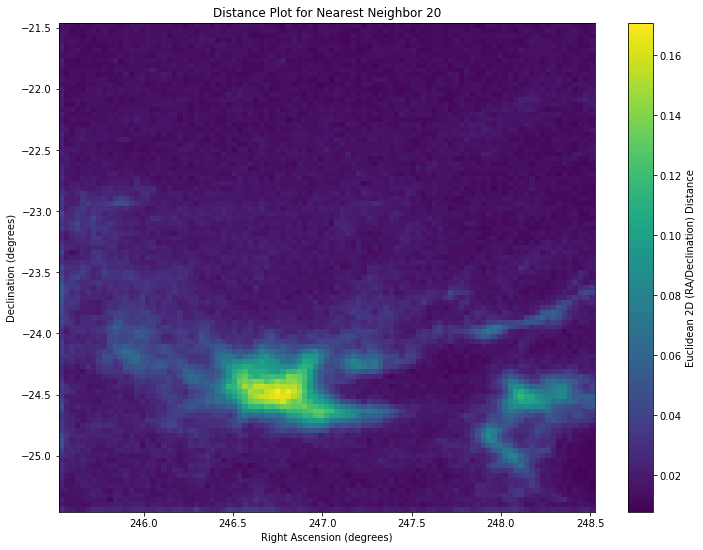

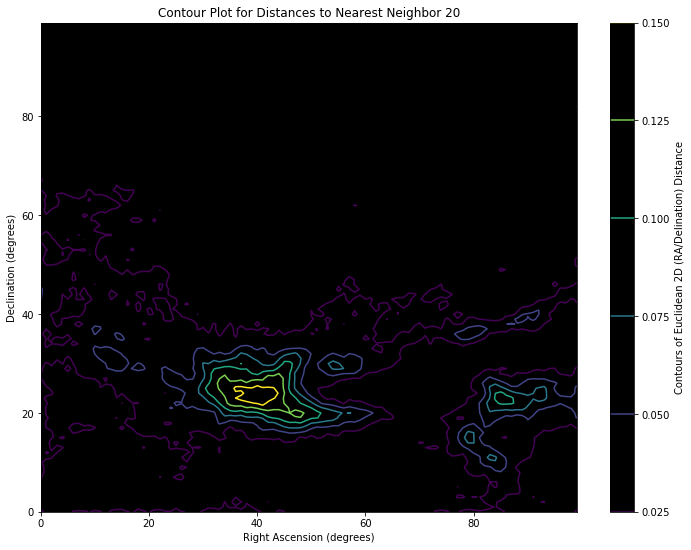

Done
Elapsed Time: 26.614834547042847 seconds
Elapsed Time: 0.44358057578404747 minutes


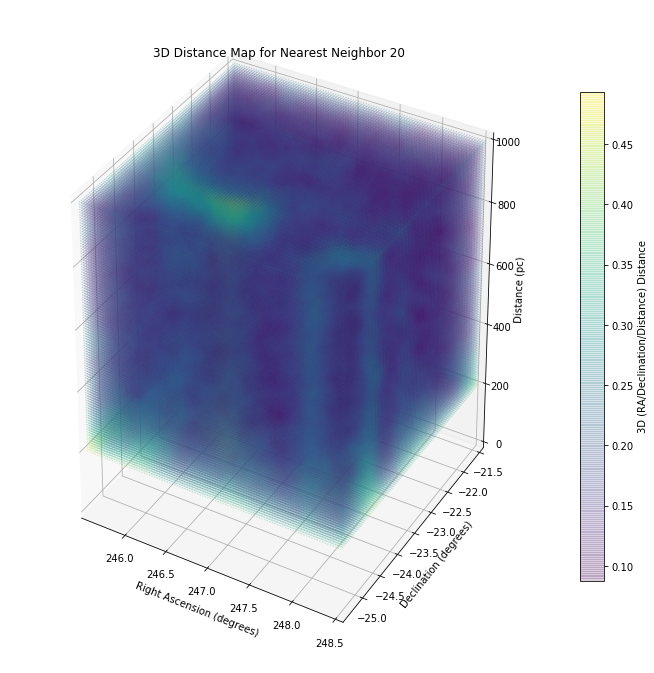

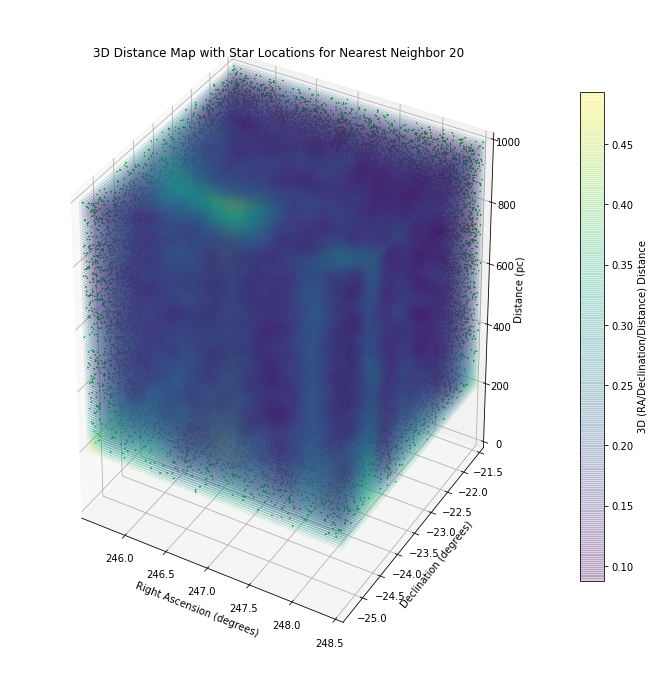

Elapsed Time: 146.745858669281 seconds
Elapsed Time: 2.4457643111546834 minutes


In [133]:
DataArray=numpy.loadtxt('Ophiuchus_DR_2_Data.txt')
StarRA=DataArray[0,:]
StarRAError=DataArray[1,:]
StarDec=DataArray[2,:]
StarDecError=DataArray[3,:]
StarParallax=DataArray[4,:]
StarParallaxError=DataArray[5,:]
#Reads in table of data and assigns important variables
ParallaxCount=len(StarParallax)
#Counts number of stars that had parallax
TotalStarNumber=336739
#Gives the total number of stars that was in the original data set
ParallaxPercentage=(ParallaxCount/TotalStarNumber)*100
print('The number of stars in this data set which have parallaxes provided is:',ParallaxCount,'(%g percent)'%(ParallaxPercentage))
#Computes percentage of stars in data set that had parallax
StarParallaxArcsec=(1/1000)*StarParallax
StarDistance=1/StarParallaxArcsec
#Finds the distance array for all the stars
print('')
print('The columns available with these data are:')
print('')
print('StarRA:')
print(StarRA)
print('')
print('StarRAError:')
print(StarRAError)
print('')
print('StarDec:')
print(StarDec)
print('')
print('StarDecError:')
print(StarDecError)
print('')
print('StarParallax:')
print(StarParallax)
print('')
print('StarParallaxError:')
print(StarParallaxError)
print('')
print('StarDistance:')
print(StarDistance)
print('')
#Prints columns and shows what the data look like
RAMin=min(StarRA)
RAMax=max(StarRA)
DecMin=min(StarDec)
DecMax=max(StarDec)
SkyRegionPlot(StarRA,StarDec,RAMin,RAMax,DecMin,DecMax)
#Runs for Ophiuchus
N=100
RAStDev,DecStDev,RAAverage,DecAverage,RA,Dec,RAPixels,DecPixels,Pixels2D=PixelSetup(StarRA,StarDec,N)
k=20
distance,indices=NearestNeighbor2D(k)
Distances=DistanceMap2D()
n=25
DistanceMapContour2D(n)
DistanceMin=200
DistanceMax=1000
DistanceAverage,DistanceStDev,Distance=DistanceSetup(DistanceMin,DistanceMax)
DistancePixels,StarArray,NumberOfPoints,Distances3D,Indices3D=NearestNeighbor3D(k,DistanceMin,DistanceMax,RA,Dec,Distance)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['figure.figsize']=12,12
ElevationAngle=30
AzimuthalAngle=-45
PlotPixelArray,X,Y,Z,Pixels=DistanceMap3D(Distances3D,ElevationAngle,AzimuthalAngle)

In [ ]:
Distance3DMed,Distance3DAvg,Cloudx,Cloudy,Cloudz=CloudCalculations()
ElevationAngleVector=[30,60,90,-30,-60]
AzimuthalAngleVector=[-45,45,135,225]
BackgroundColor='white'
CloudPlot(BackgroundColor,ElevationAngleVector,AzimuthalAngleVector)
#Runs the function with a white background

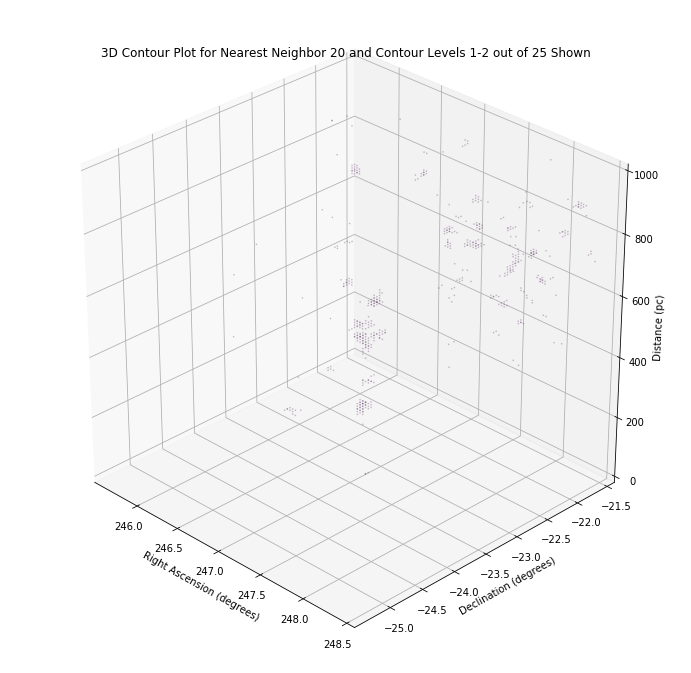

Elapsed Time: 5.476979732513428 seconds
Elapsed Time: 0.09128299554189047 minutes


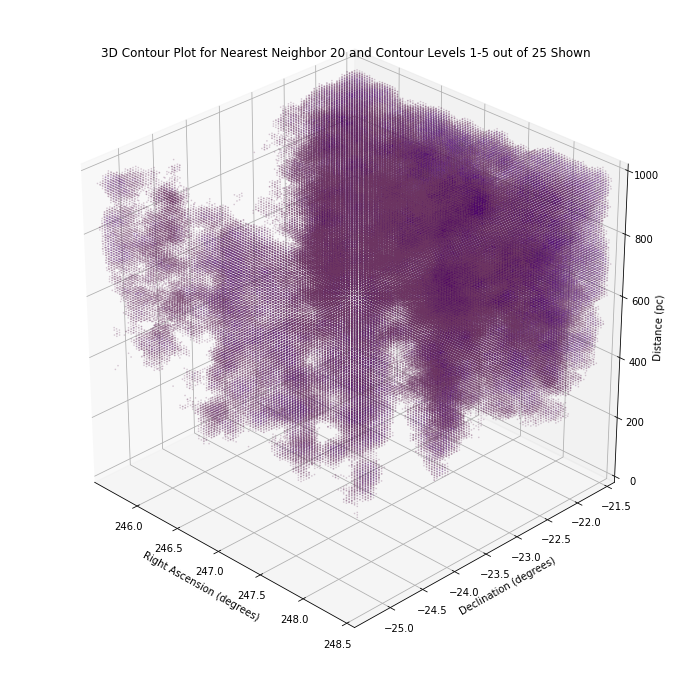

Elapsed Time: 269.65532660484314 seconds
Elapsed Time: 4.494255443414052 minutes


KeyboardInterrupt: 

In [134]:
xkcdColorsViridisAnalog=['xkcd:deep purple','xkcd:dark purple','xkcd:royal purple','xkcd:grape','xkcd:dark lavender','xkcd:blue violet','xkcd:electric blue','xkcd:azure','xkcd:sky blue','xkcd:powder blue','xkcd:pale blue','xkcd:dark green','xkcd:light forest green','xkcd:kelly green','xkcd:green','xkcd:soft green','xkcd:apple green','xkcd:electric green','xkcd:yellow green','xkcd:chartreuse','xkcd:light orange','xkcd:gold','xkcd:golden yellow','xkcd:yellowish','xkcd:yellow']
ColorVector=xkcdColorsViridisAnalog
n=25
p=1
q=2
theta=30
phi=-45
Distance3DMin,Distance3DMax,ContourLevels=Contour3D(n,p,q,ColorVector,theta,phi)
q=5
Distance3DMin,Distance3DMax,ContourLevels=Contour3D(n,p,q,ColorVector,theta,phi)

In [ ]:
q=8
Distance3DMin,Distance3DMax,ContourLevels=Contour3D(n,p,q,ColorVector,theta,phi)
q=10
Distance3DMin,Distance3DMax,ContourLevels=Contour3D(n,p,q,ColorVector,theta,phi)
q=12
Distance3DMin,Distance3DMax,ContourLevels=Contour3D(n,p,q,ColorVector,theta,phi)
q=15
Distance3DMin,Distance3DMax,ContourLevels=Contour3D(n,p,q,ColorVector,theta,phi)
q=18
Distance3DMin,Distance3DMax,ContourLevels=Contour3D(n,p,q,ColorVector,theta,phi)
q=20
Distance3DMin,Distance3DMax,ContourLevels=Contour3D(n,p,q,ColorVector,theta,phi)
q=22
Distance3DMin,Distance3DMax,ContourLevels=Contour3D(n,p,q,ColorVector,theta,phi)
q=25
Distance3DMin,Distance3DMax,ContourLevels=Contour3D(n,p,q,ColorVector,theta,phi)

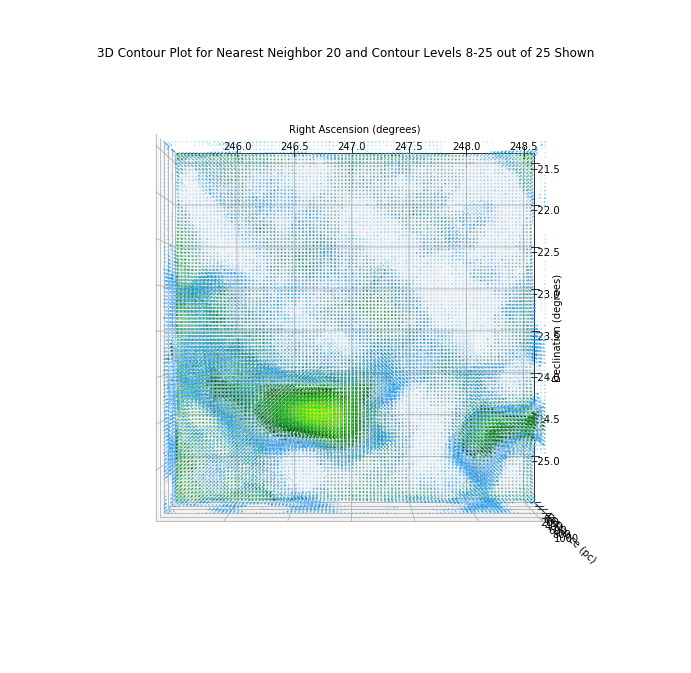

Elapsed Time: 57.705698013305664 seconds
Elapsed Time: 0.9617616335550944 minutes


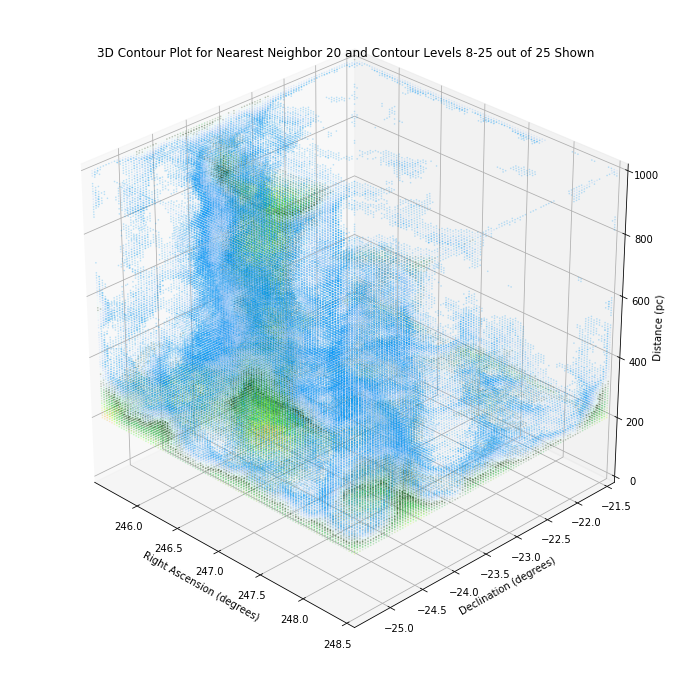

Elapsed Time: 58.019237995147705 seconds
Elapsed Time: 0.9669872999191285 minutes


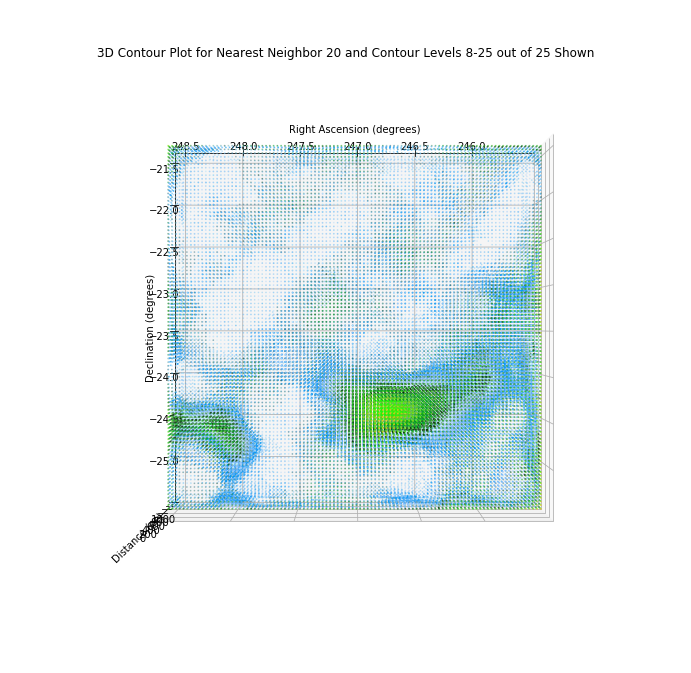

Elapsed Time: 56.70666217803955 seconds
Elapsed Time: 0.9451110363006592 minutes


In [136]:
DisplayColorVector(ColorVector)
xkcdColorsViridisAnalog=['xkcd:deep purple','xkcd:dark purple','xkcd:royal purple','xkcd:grape','xkcd:dark lavender','xkcd:blue violet','xkcd:electric blue','xkcd:azure','xkcd:sky blue','xkcd:powder blue','xkcd:pale blue','xkcd:dark green','xkcd:light forest green','xkcd:kelly green','xkcd:green','xkcd:soft green','xkcd:apple green','xkcd:electric green','xkcd:yellow green','xkcd:chartreuse','xkcd:light orange','xkcd:gold','xkcd:golden yellow','xkcd:yellowish','xkcd:yellow']
ColorVector=xkcdColorsViridisAnalog
theta=90
phi=-90
n=25
p=8
q=25
Distance3DMin,Distance3DMax,ContourLevels=Contour3D(n,p,q,ColorVector,theta,phi)
theta=30
phi=-45
Distance3DMin,Distance3DMax,ContourLevels=Contour3D(n,p,q,ColorVector,theta,phi)

The number of stars in this data set which have parallaxes provided is: 249711 (74.1557 percent)

The columns available with these data are:

StarRA:
[248.52036634 248.10048436 248.4724496  ... 246.05108056 245.85190497
 245.6453111 ]

StarRAError:
[0.43557528 1.00834076 0.44674483 ... 0.61276532 0.32391122 0.57407355]

StarDec:
[-21.69423876 -21.79532743 -21.64183886 ... -23.35729622 -23.38019673
 -23.26056138]

StarDecError:
[0.26234466 0.48755589 0.24268439 ... 0.28051106 0.1625579  0.31605514]

StarParallax:
[ 0.81715249 -1.35641518  1.64768465 ...  0.08376922 -0.25246162
  1.23497203]

StarParallaxError:
[0.45127778 1.25915587 0.47063415 ... 0.68549722 0.35004803 0.58047573]

StarDistance:
[ 1223.76180212  -737.2373997    606.91224939 ... 11937.55952112
 -3960.99814004   809.73494008]

The number of stars in this data set which have good parallaxes provided is: 179237 (53.2273 percent)
Elapsed Time: 104.07378816604614 seconds
Elapsed Time: 1.734563136100769 minutes
Elapsed Time: 1

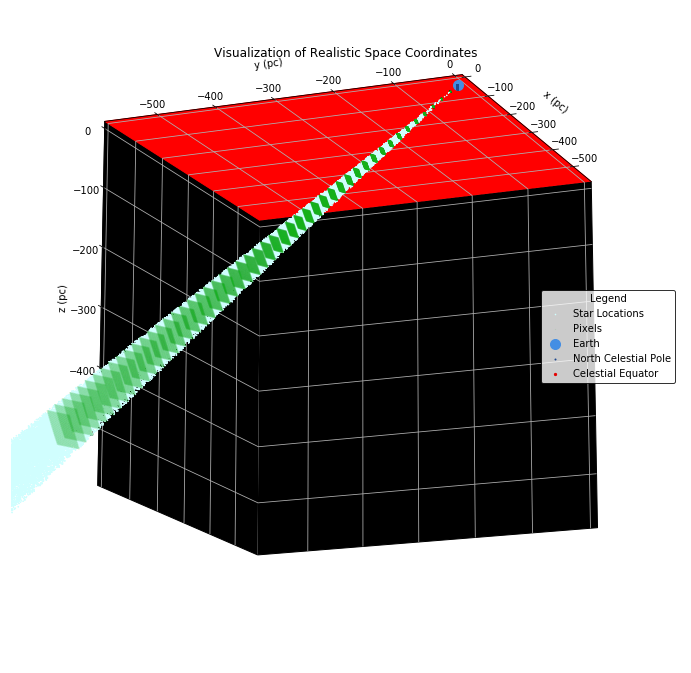

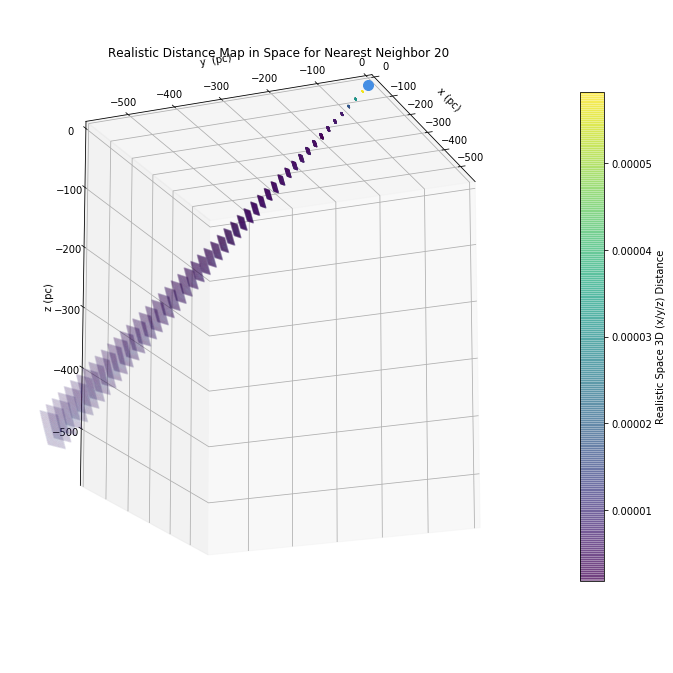

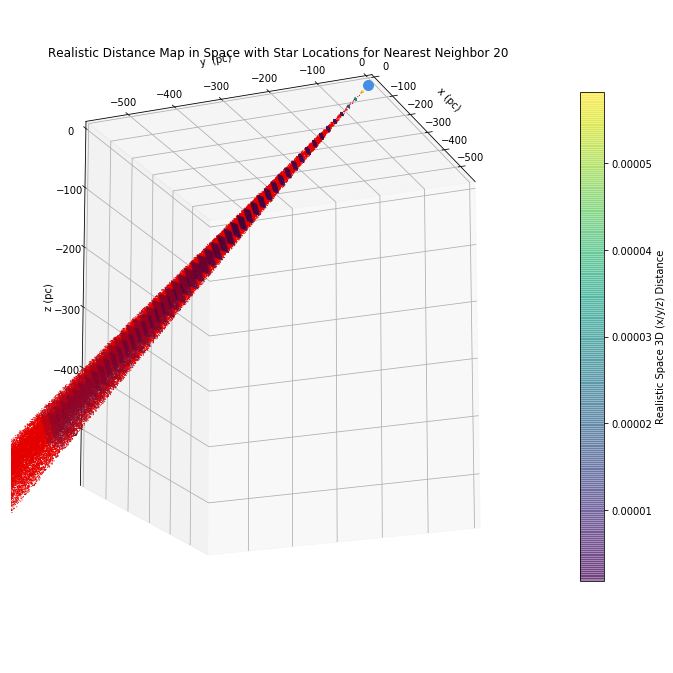

Elapsed Time: 27.714720964431763 seconds
Elapsed Time: 0.46191201607386273 minutes
Star x-Coordinate Minimum: -211356055.26959834 pc
Star x-Coordinate Maximum: -6.162970774310769 pc
Star y-Coordinate Minimum: -477569997.34521925 pc
Star y-Coordinate Maximum: -13.700576540031074 pc
Star z-Coordinate Minimum: -215341108.08224076 pc
Star z-Coordinate Maximum: -6.913802747438325 pc
Star x-Coordinate Average: -4036.358864090248 pc
Star x-Coordinate Median: -588.9506013979322 pc
Star y-Coordinate Average: -9452.178270816925 pc
Star y-Coordinate Median: -1396.054601241443 pc
Star z-Coordinate Average: -4341.137493256946 pc
Star z-Coordinate Median: -643.6989567203157 pc


In [173]:
DataArray=numpy.loadtxt('Ophiuchus_DR_2_Data.txt')
StarRA=DataArray[0,:]
StarRAError=DataArray[1,:]
StarDec=DataArray[2,:]
StarDecError=DataArray[3,:]
StarParallax=DataArray[4,:]
StarParallaxError=DataArray[5,:]
#Reads in table of data and assigns important variables
ParallaxCount=len(StarParallax)
#Counts number of stars that had parallax
TotalStarNumber=336739
#Gives the total number of stars that was in the original data set
ParallaxPercentage=(ParallaxCount/TotalStarNumber)*100
print('The number of stars in this data set which have parallaxes provided is:',ParallaxCount,'(%g percent)'%(ParallaxPercentage))
#Computes percentage of stars in data set that had parallax
StarParallaxArcsec=(1/1000)*StarParallax
StarDistance=1/StarParallaxArcsec
#Finds the distance array for all the stars
print('')
print('The columns available with these data are:')
print('')
print('StarRA:')
print(StarRA)
print('')
print('StarRAError:')
print(StarRAError)
print('')
print('StarDec:')
print(StarDec)
print('')
print('StarDecError:')
print(StarDecError)
print('')
print('StarParallax:')
print(StarParallax)
print('')
print('StarParallaxError:')
print(StarParallaxError)
print('')
print('StarDistance:')
print(StarDistance)
print('')
#Prints columns and shows what the data look like
StarRA,StarDec,StarParallax,ParallaxCount,ParallaxPercentage,StarDistance=GoodParallaxData(StarRA,StarDec,StarParallax)
Starrho,pi,Startheta,Starphi,Starx,Stary,Starz,rhoMin,rhoMax,thetaMin,thetaMax,phiMin,phiMax,xMin,xMax,yMin,yMax,zMin,zMax=RealisticCoordinates(StarDistance,StarDec,StarRA)
N=50
rhoMax=1000
NumberOfPoints,xPixels,yPixels,zPixels,xStDev,xAverage,x,yStDev,yAverage,y,zStDev,zAverage,z,xPix,yPix,zPix,RealisticPixels=RealisticPixelSetup(Starrho,Startheta,Starphi,rhoMin,rhoMax,thetaMin,thetaMax,phiMin,phiMax,N)
RealisticStarArray,RealisticDistances,RealisticIndices=RealisticNearestNeighbor(x,y,z,k)
ElevationAngle=-15
AzimuthalAngle=22.5
RealisticSpacePlot(ElevationAngle,AzimuthalAngle)
plt.rcParams['figure.figsize']=12,12
plt.rcParams['axes.facecolor']='white'
#Sets the figure size and background color
RealisticPixels=RealisticDistanceMap(RealisticDistances,ElevationAngle,AzimuthalAngle)
print('Star x-Coordinate Minimum:',xMin,'pc')
print('Star x-Coordinate Maximum:',xMax,'pc')
print('Star y-Coordinate Minimum:',yMin,'pc')
print('Star y-Coordinate Maximum:',yMax,'pc')
print('Star z-Coordinate Minimum:',zMin,'pc')
print('Star z-Coordinate Maximum:',zMax,'pc')
print('Star x-Coordinate Average:',numpy.average(Starx),'pc')
print('Star x-Coordinate Median:',numpy.median(Starx),'pc')
print('Star y-Coordinate Average:',numpy.average(Stary),'pc')
print('Star y-Coordinate Median:',numpy.median(Stary),'pc')
print('Star z-Coordinate Average:',numpy.average(Starz),'pc')
print('Star z-Coordinate Median:',numpy.median(Starz),'pc')